In [1]:
import pandas as pd
import numpy as np


In [2]:
df= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/Zomato-data-.csv')

In [3]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


In [4]:
df.isnull().sum()

,0
name,0
online_order,0
book_table,0
rate,0
votes,0
approx_cost(for two people),0
listed_in(type),0


In [5]:
df.drop_duplicates(inplace=True)

In [6]:
df.shape

(148, 7)

In [7]:
def clean_rate(rating):
  lst = rating.split('/')
  return lst[0]


In [8]:
df['rate'] = df['rate'].apply(clean_rate)

In [9]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


In [10]:
df['listed_in(type)'].value_counts()

,count
listed_in(type),
Dining,110
Cafes,23
other,8
Buffet,7


In [11]:
from matplotlib import pyplot as plt
import seaborn as sns

Text(0.5, 0, 'Type of Restaurant')

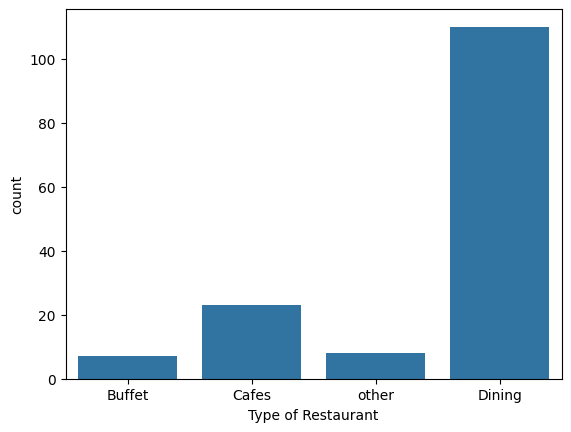

In [12]:
sns.countplot(x= df['listed_in(type)'])
plt.xlabel("Type of Restaurant")

In [13]:
grouped_data = df.groupby('listed_in(type)')['votes'].sum()

In [14]:
result = pd.DataFrame({'votes':grouped_data})


<BarContainer object of 4 artists>

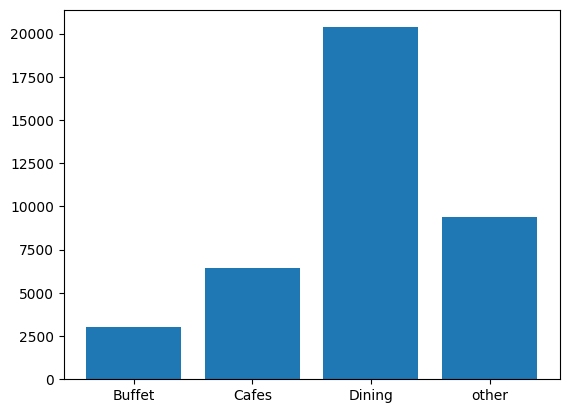

In [15]:
plt.bar(['Buffet', 'Cafes', 'Dining', 'other'], result['votes'])

In [16]:
result.columns

Index(['votes'], dtype='object')

In [17]:
df.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes',
       'approx_cost(for two people)', 'listed_in(type)'],
      dtype='object')

In [18]:
df['listed_in(type)'].unique()

array(['Buffet', 'Cafes', 'other', 'Dining'], dtype=object)

In [19]:
result

,votes
listed_in(type),
Buffet,3028
Cafes,6434
Dining,20363
other,9367


Text(0, 0.5, 'Votes')

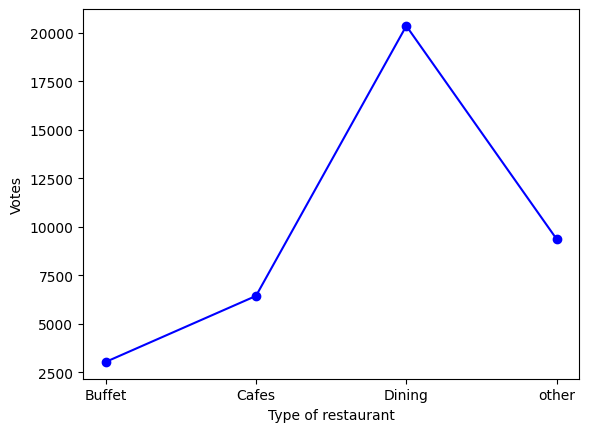

In [20]:
plt.plot(result, color='blue', marker= 'o')
plt.xlabel('Type of restaurant')
plt.ylabel('Votes')

In [21]:
max_votes= df['votes'].max()

In [22]:
restaurant_name = df.loc[df['votes'] == max_votes, 'name']

In [23]:
restaurant_name

,name
38,Empire Restaurant


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         148 non-null    object
 1   online_order                 148 non-null    object
 2   book_table                   148 non-null    object
 3   rate                         148 non-null    object
 4   votes                        148 non-null    int64 
 5   approx_cost(for two people)  148 non-null    int64 
 6   listed_in(type)              148 non-null    object
dtypes: int64(2), object(5)
memory usage: 8.2+ KB


In [25]:
df['rate'] = df['rate'].apply(lambda x: float(x))

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


In [27]:
min_rating = df['rate'].min()

In [28]:
df[df['rate'] == min_rating]['name']

,name
94,Nandhini Deluxe


In [29]:
max_rating= df['rate'].max()
df.loc[df['rate'] == max_rating, 'name'].unique()

array(['Onesta'], dtype=object)

<Axes: xlabel='online_order', ylabel='count'>

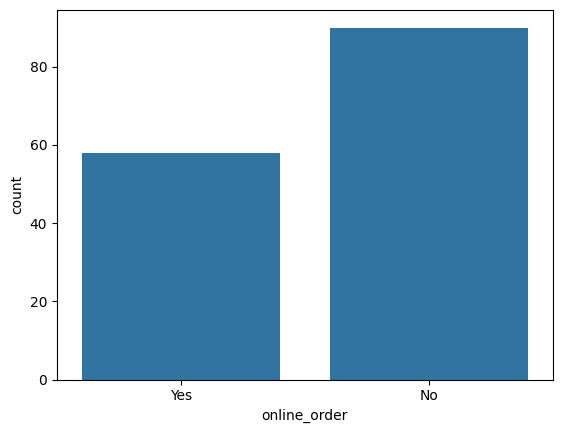

In [33]:
sns.countplot(x= df['online_order'])

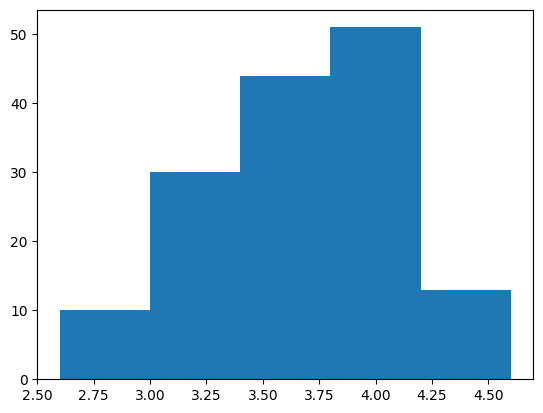

In [35]:
plt.hist(df['rate'], bins=5)
plt.show()

In [36]:
df['rate'].apply(lambda x: 1 if x<4 and x>3 else 0).sum()

np.int64(102)

In [37]:
df['rate'].apply(lambda x: 1 if x<5 and x>4 else 0).sum()

np.int64(24)

In [38]:
df['rate'].apply(lambda x: 1 if x<3 and x>2 else 0).sum()

np.int64(10)

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

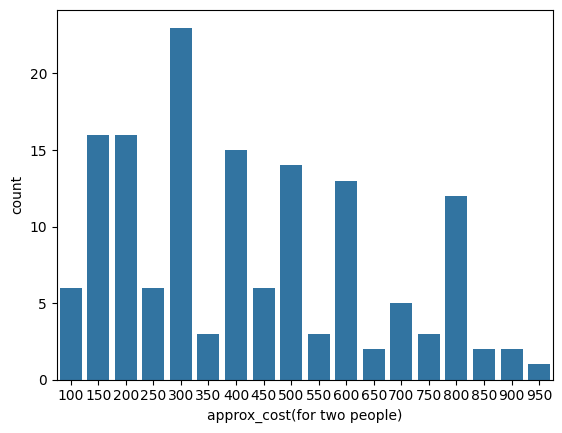

In [42]:
sns.countplot(x= df['approx_cost(for two people)'])

<Axes: xlabel='online_order', ylabel='rate'>

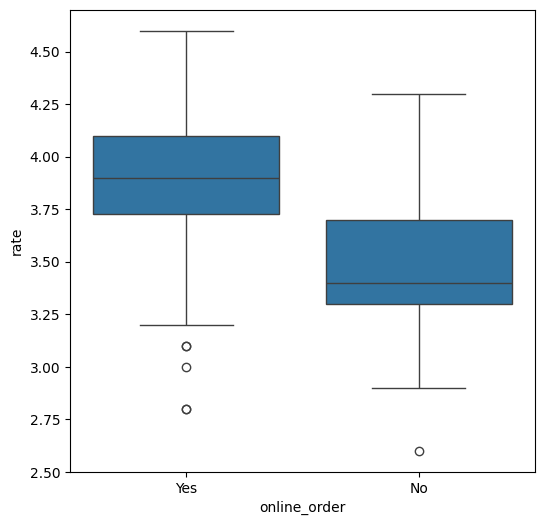

In [43]:
plt.figure(figsize = (6, 6))
sns.boxplot(x= 'online_order', y= 'rate', data= df)